In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install import-ipynb

In [3]:
!pip install pandas numpy matplotlib seaborn nltk beautifulsoup4 textblob tqdm

In [4]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import nltk
import spacy
import string
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from IPython import display
from matplotlib_inline.backend_inline import set_matplotlib_formats  # Import the new method

# Set the format for matplotlib
set_matplotlib_formats('svg')  # Use the updated method
warnings.filterwarnings('ignore')

# Load your dataset
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')


In [5]:
# Display the first few rows of the dataset
df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,ratings,reviews.sourceURLs,reviewsText,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [6]:
# Display summary statistics
df.describe()


,reviews.id,reviews.numHelpful,ratings
count,2.900000e+01,5000.000000,5000.000000
mean,1.858740e+08,0.312400,4.596800
std,2.084040e+07,3.111582,0.731804
min,1.082112e+08,0.000000,1.000000
25%,1.851185e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981949e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


In [7]:
# Check for missing values
df.isnull().sum()


id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
ratings                   0
reviews.sourceURLs        0
reviewsText               0
reviews.title            13
reviews.username          1
sourceURLs                0
dtype: int64

In [8]:
# column selection
df = df[['reviewsText', 'ratings']]
df.head()

,reviewsText,ratings
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [9]:
# check the shape
df.shape

(5000, 2)

In [10]:
# null values or not
df.isnull().sum()

reviewsText    0
ratings        0
dtype: int64

In [11]:
# unique categories 
df['ratings'].value_counts()

ratings
5    3478
4    1208
3     197
1      63
2      54
Name: count, dtype: int64

In [12]:
# if rating is above 3 we will consider it as 0 else 1.
df["ratings"] = df["ratings"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1

In [13]:
df['ratings'].value_counts()

ratings
0    4883
1     117
Name: count, dtype: int64

In [14]:
 

# get the text based on ratings! 
rating_zero = df['reviewsText'][df['ratings'] == 0] 
rating_one = df['reviewsText'][df['ratings'] == 1]


# word tokenize the data 
def list_tokenizer(ratings): 
    ratings = " ".join(ratings)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer 
def word_cloud(ratings, number): 
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)  
    wc.generate(ratings)  
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'WordCloud for {number}')
    plt.axis('off');
    


    

In [15]:
# 1. lowering case 
df['reviewsText'] = df['reviewsText'].str.lower()  # lowering the case! 
df.head()

,reviewsText,ratings
0,i thought it would be as big as small paper bu...,0
1,this kindle is light and easy to use especiall...,0
2,didnt know how much i'd use a kindle so went f...,0
3,i am 100 happy with my purchase. i caught it o...,0
4,solid entry level kindle. great for kids. gift...,0


In [16]:
# 2. remove punctuation! 
df['reviewsText'] = df['reviewsText'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x)) 
df.head()

,reviewsText,ratings
0,i thought it would be as big as small paper bu...,0
1,this kindle is light and easy to use especiall...,0
2,didnt know how much id use a kindle so went fo...,0
3,i am 100 happy with my purchase i caught it on...,0
4,solid entry level kindle great for kids gifted...,0


In [17]:
# 3. removing topwords!

from spacy.lang.en.stop_words import STOP_WORDS
df['reviewsText'] = df['reviewsText'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )

df.head()

,reviewsText,ratings
0,thought big small paper turn like palm think s...,0
1,kindle light easy use especially beach,0
2,didnt know id use kindle went lower end im hap...,0
3,100 happy purchase caught sale good price norm...,0
4,solid entry level kindle great kids gifted kid...,0


In [18]:
# 4. remove url and tags! 
df['reviewsText'] = df['reviewsText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
                                              
df.head()

,reviewsText,ratings
0,thought big small paper turn like palm think s...,0
1,kindle light easy use especially beach,0
2,didnt know id use kindle went lower end im hap...,0
3,100 happy purchase caught sale good price norm...,0
4,solid entry level kindle great kids gifted kid...,0


In [19]:
# 5. remove html tags! 
df['reviewsText'] = df['reviewsText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

df.head()

,reviewsText,ratings
0,thought big small paper turn like palm think s...,0
1,kindle light easy use especially beach,0
2,didnt know id use kindle went lower end im hap...,0
3,100 happy purchase caught sale good price norm...,0
4,solid entry level kindle great kids gifted kid...,0


In [20]:
# 6. remove extra spaces
df['reviewsText'] = df['reviewsText'].apply(lambda x: " ".join(x.split()))
df.head()

,reviewsText,ratings
0,thought big small paper turn like palm think s...,0
1,kindle light easy use especially beach,0
2,didnt know id use kindle went lower end im hap...,0
3,100 happy purchase caught sale good price norm...,0
4,solid entry level kindle great kids gifted kid...,0


In [21]:
# 7. lemmatizer 

%time
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["reviewsText"] = df["reviewsText"].apply(lambda text: lemmatize_words(text))
df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,reviewsText,ratings
0,thought big small paper turn like palm think s...,0
1,kindle light easy use especially beach,0
2,didnt know id use kindle went lower end im hap...,0
3,100 happy purchase caught sale good price norm...,0
4,solid entry level kindle great kid gifted kid ...,0


Best Parameters: {}
Confusion Matrix:
 [[1399   63]
 [  28   10]]

Accuracy: 0.9393333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1462
           1       0.14      0.26      0.18        38

    accuracy                           0.94      1500
   macro avg       0.56      0.61      0.57      1500
weighted avg       0.96      0.94      0.95      1500



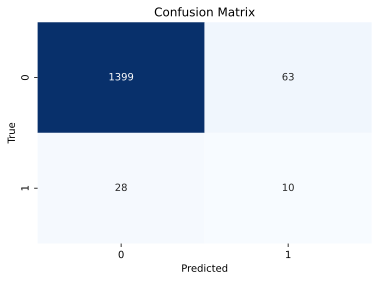

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data = data[['reviewsText', 'ratings']]
data["ratings"] = data["ratings"].apply(lambda x: 1 if x < 3 else 0)

# Data split with a fixed random seed for reproducibility
xtrain, xtest, ytrain, ytest = train_test_split(data['reviewsText'], data['ratings'], test_size=0.3, random_state=42)

# Convert text to numbers using (BOW)
vectorizer = CountVectorizer()

# Convert using BOW
xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()

# Parameter grid for GridSearchCV
param_grid = {}

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(xtrain_bow, ytrain)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Naive Bayes model with the best parameters
clf_bow = GaussianNB(**best_params).fit(xtrain_bow, ytrain)

# Predict using BOW
prediction_bow = clf_bow.predict(xtest_bow)

# Evaluate the model
def metrics(prediction, actual):
    print('Confusion Matrix:\n', confusion_matrix(actual, prediction))
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nClassification Report:\n', classification_report(actual, prediction))

# Display metrics
metrics(prediction_bow, ytest)

# Plot confusion matrix with adjusted size and font size
cm = confusion_matrix(ytest, prediction_bow)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 10})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.971
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.45      0.61        51
        True       0.97      1.00      0.98       949

    accuracy                           0.97      1000
   macro avg       0.96      0.72      0.80      1000
weighted avg       0.97      0.97      0.97      1000



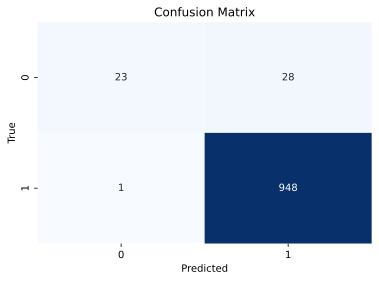


Confusion Matrix Table:
Predicted  False  True   All
Actual                      
False         23    28    51
True           1   948   949
All           24   976  1000


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

# Convert 'reviews.rating' to numeric (replace non-convertible values with -1)
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce', downcast='integer').fillna(-1)

# Select features for training
features = ['reviews.numHelpful', 'ratings']  # Add more features as needed

# Use the selected features for X
X = df[features]

# Target variable
y = df['reviews.doRecommend']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train RandomForestClassifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print("Classification Report:")
classification_report_rf = classification_report(y_test, y_pred)
print(classification_report_rf)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for confusion matrix
cm_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 10})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display confusion matrix as a table
print("\nConfusion Matrix Table:")
print(cm_df)


Best Parameters: {'C': 1, 'max_iter': 100}
Confusion Matrix:
[[1459    3]
 [  29    9]]
Accuracy: 97.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1462
           1       0.75      0.24      0.36        38

    accuracy                           0.98      1500
   macro avg       0.87      0.62      0.67      1500
weighted avg       0.97      0.98      0.97      1500



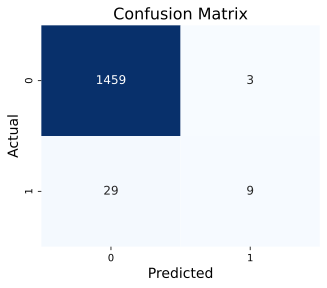

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data = data[['reviewsText', 'ratings']]
data["ratings"] = data["ratings"].apply(lambda x: 1 if x < 3 else 0)

# Data split with fixed random seed for reproducibility
xtrain, xtest, ytrain, ytest = train_test_split(data['reviewsText'], data['ratings'], test_size=0.3, random_state=42)

# Vectorize using BOW
vectorizer = CountVectorizer()
xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]}

# Initialize Logistic Regression classifier
logistic_reg = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(xtrain_bow, ytrain)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Logistic Regression model with the best parameters
clf_logistic = LogisticRegression(**best_params)
clf_logistic.fit(xtrain_bow, ytrain)

# Predict using BOW
prediction_logistic = clf_logistic.predict(xtest_bow)

# Display confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(ytest, prediction_logistic)
print(cm)

# Display accuracy
accuracy_logistic = accuracy_score(ytest, prediction_logistic)
print("Accuracy:", f"{accuracy_logistic * 100:.2f}%")

# Display classification report
print("Classification Report:")
classification_report_logistic = classification_report(ytest, prediction_logistic)
print(classification_report_logistic)

# Plot confusion matrix with adjusted size and font size
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], cbar=False, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix:
[[1462    0]
 [  28   10]]
Accuracy: 98.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1462
           1       1.00      0.26      0.42        38

    accuracy                           0.98      1500
   macro avg       0.99      0.63      0.70      1500
weighted avg       0.98      0.98      0.98      1500



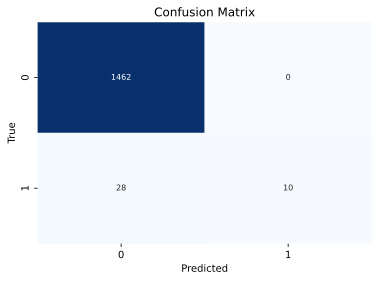

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data = data[['reviewsText', 'ratings']]
data["ratings"] = data["ratings"].apply(lambda x: 1 if x < 3 else 0)

# Data split with fixed random seed for reproducibility
xtrain, xtest, ytrain, ytest = train_test_split(data['reviewsText'], data['ratings'], test_size=0.3, random_state=42)

# Vectorize using BOW
vectorizer = CountVectorizer()
xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()

# parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Initialize SVM classifier
svc = SVC()

# Initialize GridSearchCV with 5-fold cross-validation and parallelize
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(xtrain_bow, ytrain)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Support Vector Machine (SVM) model with the best parameters
clf_svm = SVC(**best_params)
clf_svm.fit(xtrain_bow, ytrain)

# Predict using BOW
prediction_svm = clf_svm.predict(xtest_bow)

# Display confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(ytest, prediction_svm)
print(cm)

# Display accuracy
accuracy_svm = accuracy_score(ytest, prediction_svm)
print("Accuracy:", f"{accuracy_svm * 100:.2f}%")

# Display classification report
print("Classification Report:")
classification_report_svm = classification_report(ytest, prediction_svm)
print(classification_report_svm)

# Plot confusion matrix with adjusted figure size and font size
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 8})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [26]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Khushbu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [28]:
sia= SentimentIntensityAnalyzer()

In [29]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [30]:
sia.polarity_scores("This is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [31]:
sia.polarity_scores("reviewsText")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [32]:
# Polarity score on the entire dataset

In [33]:
res={}
for i, row in tqdm(df.iterrows(),total =len(df)):
    text = row['reviewsText']
    myid= row['id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/5000 [00:00<?, ?it/s]

In [34]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df , how='left')

In [35]:
vaders.head()

,id,neg,neu,pos,compound,dateAdded,dateUpdated,name,asins,brand,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,ratings,reviews.sourceURLs,reviewsText,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,0.0,0.53,0.47,0.796,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,0.0,0.53,0.47,0.796,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,0.0,0.53,0.47,0.796,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,0.0,0.53,0.47,0.796,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,0.0,0.53,0.47,0.796,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


Text(0.5, 1.0, 'Compound score by Amazon Reviews')

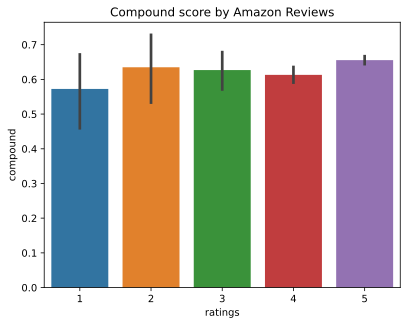

In [36]:
ax=sns.barplot(data=vaders , x='ratings',y='compound')
ax.set_title('Compound score by Amazon Reviews')

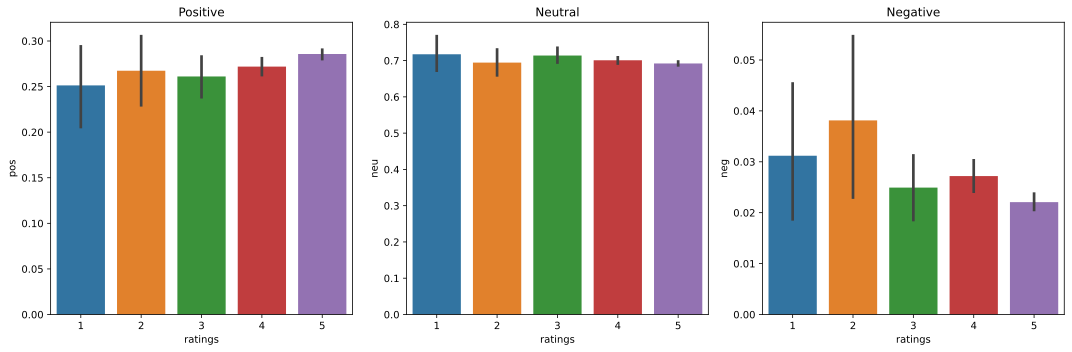

In [37]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='ratings', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ratings', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ratings', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')  
axs[2].set_title('Negative')
plt.tight_layout()

plt.show()


In [38]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis

def analyze_sentiment_with_rating(review, rating):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(review)['compound']
    
    # Adjust sentiment score based on rating
    adjusted_score = sentiment_score + (rating - 3) * 0.1
    
    if adjusted_score >= 0.05:
        return 'Positive'
    elif adjusted_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

while True:
    # Get user input for review and rating
    user_review = input("Enter your review (type 'exit' to end): ")
    
    if user_review.lower() == 'exit':
        print("Exiting the program.")
        break
    
    user_rating = float(input("Enter your rating (between 1 and 5): "))
    
    # Perform sentiment analysis considering both review and rating
    sentiment = analyze_sentiment_with_rating(user_review, user_rating)

    # Display the result
    print(f"Your review: '{user_review}' | Your rating: {user_rating} | Sentiment: {sentiment}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Khushbu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter your review (type 'exit' to end):  exit


Exiting the program.
